**Import our moduels**



In [3]:
import requests, io,  geopandas, branca.colormap, json, folium
import pandas as pd
from folium.plugins import MarkerCluster
from shapely.geometry import Point


In [4]:
df = pd.read_csv('srdb-data-V5.csv')[['Latitude', 'Longitude', 'Study_midyear', 'Study_number', 'Rs_annual', 'Site_name']].dropna().astype(str)
df['Study_midyear'] = [pd.to_datetime(row[0:4]+'-06-01', format='%Y-%m-%d') for row in df['Study_midyear']]
##df = df.drop_duplicates(subset=['Study_midyear'], keep='first').sort_values('Study_midyear')
df['Study_midyear'] = df['Study_midyear'].astype(int) // 10 ** 9
df['Study_midyear'] = df['Study_midyear'].astype("U10")
df.to_csv('test.csv')

/home/digiadmin/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (4,39,61) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
datetime_index = df.drop_duplicates(subset=['Study_midyear'])[['Study_midyear']]
datetime_index = datetime_index.sort_values('Study_midyear').astype(int)
datetime_index = datetime_index['Study_midyear'].tolist()
datetime_index

[-113184000,
 -144720000,
 -176256000,
 -18489600,
 -239414400,
 -270950400,
 -50025600,
 -81648000,
 1022889600,
 1054425600,
 107740800,
 1086048000,
 1117584000,
 1149120000,
 1180656000,
 1212278400,
 1243814400,
 1275350400,
 13046400,
 1306886400,
 1338508800,
 1370044800,
 139276800,
 1401580800,
 1433116800,
 1464739200,
 1496275200,
 170812800,
 202435200,
 233971200,
 265507200,
 297043200,
 328665600,
 360201600,
 391737600,
 423273600,
 44582400,
 454896000,
 486432000,
 517968000,
 549504000,
 581126400,
 612662400,
 644198400,
 675734400,
 707356800,
 738892800,
 76204800,
 770428800,
 801964800,
 833587200,
 865123200,
 896659200,
 928195200,
 959817600,
 991353600]

**Create pandas df containing data for gejson**

In [6]:
coords = df[['Latitude', 'Longitude', 'Study_number', 'Rs_annual']].astype(float)
coords.drop_duplicates(subset=['Study_number'], keep='first', inplace=True)
coords.sort_values('Study_number', inplace = True)

**Create styledict**

In [7]:
linear = branca.colormap.LinearColormap(["green", "yellow", "red"], vmin=0, vmax=7000)
linear

<AxesSubplot:>

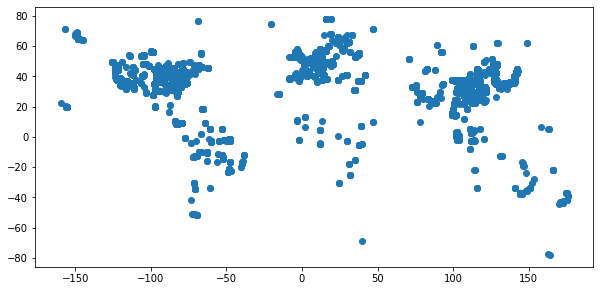

In [8]:
styledata = df[['Latitude', 'Longitude', 'Study_number', 'Rs_annual', 'Study_midyear']].astype(float)
styledata = geopandas.GeoDataFrame(styledata.drop(columns=['Latitude', 'Longitude']), 
                           geometry=[Point(xy) for xy in zip(styledata.Longitude.astype(float), styledata.Latitude.astype(float))])
styledata.plot(figsize=(10, 10))

In [9]:
styledata.sort_values('Study_number', inplace = True)
styledata["color"] = styledata['Rs_annual'].apply(linear)
#styledata["opacity"] = 1
#styledata['ID'] = styledata.reset_index(drop=True).index
#styledata.drop(columns=['Study_number', 'Rs_annual'], inplace=True)
styledata.to_csv('a.csv')
styledata

,Study_number,Rs_annual,Study_midyear,geometry,color
2782,14.0,1240.00,-2.709504e+08,POINT (23.73000 0.80000),#5aad00ff
109,17.0,400.00,-2.394144e+08,POINT (-0.36000 51.81000),#1d8f00ff
782,20.0,376.00,-2.709504e+08,POINT (-84.29000 35.99000),#1b8e00ff
783,20.0,419.00,-2.709504e+08,POINT (-84.29000 35.99000),#1e8f00ff
784,20.0,422.00,-2.709504e+08,POINT (-84.29000 35.99000),#1e8f00ff
...,...,...,...,...,...
10353,11960.0,890.60,1.496275e+09,POINT (37.52600 55.70800),#41a000ff
10354,11960.0,496.40,1.401581e+09,POINT (37.52600 55.70800),#249200ff
10355,11960.0,477.30,1.433117e+09,POINT (37.52600 55.70800),#229100ff
10356,11960.0,690.00,1.464739e+09,POINT (37.52600 55.70800),#329900ff


In [10]:
#time_series_data = {
#    int(Study_number): data.to_dict(orient="index") for Study_number, data in s.items()
#}

In [12]:
for i, Study_number in enumerate(styledata.index):
    sample_data = pd.DataFrame(
        {
            "color": styledata.Study_number.iloc(i),
            "opacity": 1,
        },
        index=datetime_index
    )
    #ample_data
    #styledata['ID'] = sample_data

ValueError: No axis named 1 for object type Series



```
#gb = df.set_index('Study_number')
gb = df.groupby(['Study_number'])#.to_json(orient="index")
result = gb['Rs_annual'].unique()
result.reset_index(inplace=True)
#parsed = json.loads(result)
#with open('data.json', 'w') as outfile:
#    json.dump(parsed, outfile)  
result.head(5)
```



In [ ]:
time_series_data = {
    int(Study_number): data.to_dict(orient="index") for Study_number, data in s.items()
}

NameError: name 's' is not defined



```
ID : {
    time:{colour: '' opactiy: ''}
    time1:{colour: '' opactiy: ''}
    time2{colour: '' opactiy: ''}
    }
ID1 : {
    time:{colour: '' opactiy: ''}
    time1:{colour: '' opactiy: ''}
    time2{colour: '' opactiy: ''}
    }
```



In [ ]:
from folium.plugins import TimeSliderChoropleth
m = folium.Map([24, 84], tiles='cartodbpositron', zoom_start=5)
#marker_cluster = MarkerCluster().add_to(m)

In [ ]:
g = TimeSliderChoropleth(
    s.to_json(),
    styledict=time_series_data
).add_to(m)#marker_cluster)
m

In [ ]:
s = 